In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold,ShuffleSplit,cross_val_score

In [3]:
shuju3= pd.read_excel("LIPIRIN_TOP30% 第2次_共2_identify-new.xlsx",index_col=0)

In [4]:
shuju3_ =shuju3.copy()

In [5]:
shuju3_

,CLASS2,Hypoxanthine,D-Ribose 5-Phosphate
MetaboName,,,
B60,1,1.780298e+07,5.250820e+07
B63,1,1.586566e+07,2.898887e+07
B64,1,2.267567e+07,2.171345e+07
B67,1,2.816587e+07,2.652347e+07
B75,1,1.740545e+07,2.850349e+07
B77,1,2.279251e+07,2.140806e+07
B83,1,7.824715e+07,6.419264e+07
B85,1,5.671875e+09,9.366450e+07
B90,1,2.940433e+09,1.520331e+08


In [6]:
FFS3 =shuju3_.drop(columns=['CLASS2'])

In [7]:
FFS3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20 entries, B60 to B97
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Hypoxanthine          20 non-null     float64
 1   D-Ribose 5-Phosphate  20 non-null     float64
dtypes: float64(2)
memory usage: 480.0+ bytes


In [8]:
target3 = shuju3_.CLASS2

In [9]:
transfer = StandardScaler()

In [10]:
tezheng3 = transfer.fit_transform(FFS3)

In [11]:
tezheng3

array([[-0.86830228, -0.66340003],
       [-0.86869784, -0.96295616],
       [-0.86730739, -1.05562035],
       [-0.86618642, -0.99435698],
       [-0.86838345, -0.96913825],
       [-0.86728354, -1.05950992],
       [-0.85596099, -0.51457995],
       [ 0.28612752, -0.13920881],
       [-0.27156929,  0.60420838],
       [-0.26108728, -0.17662697],
       [ 2.38656799,  0.57909778],
       [ 0.64888012, -0.04946684],
       [-0.86828305, -0.47424442],
       [-0.85365796, -0.73797882],
       [ 1.01863008,  1.91906155],
       [ 0.51047602,  2.60118424],
       [ 2.09978116,  0.89738488],
       [ 1.00087605, -0.2781394 ],
       [-0.09209256,  0.37547954],
       [ 0.45747311,  1.09881052]])

In [12]:
sss3 = ShuffleSplit(n_splits=10, test_size=0.2,random_state=9999)

In [13]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.svm import SVC

In [14]:
CCs2 = np.logspace(-3,3,1000)

In [15]:
param_distributions={'C': np.logspace(-3,3,1000),'gamma': np.logspace(-3,3,1000), 'kernel': ['linear', 'rbf']}

In [16]:
svc_clf = SVC()

In [17]:
random_search =RandomizedSearchCV(svc_clf, param_distributions, cv=sss3, n_iter=2000)

In [18]:
random_search.fit(tezheng3, target3)

RandomizedSearchCV(cv=ShuffleSplit(n_splits=10, random_state=9999, test_size=0.2, train_size=None),
                   estimator=SVC(), n_iter=2000,
                   param_distributions={'C': array([1.00000000e-03, 1.01392541e-03, 1.02804473e-03, 1.04236067e-03,
       1.05687597e-03, 1.07159340e-03, 1.08651577e-03, 1.10164595e-03,
       1.11698682e-03, 1.13254132e-03, 1.14831241e-03, 1.16430313e-03,
       1.18051653e-03...
       7.27548353e+02, 7.37679760e+02, 7.47952252e+02, 7.58367791e+02,
       7.68928372e+02, 7.79636013e+02, 7.90492762e+02, 8.01500696e+02,
       8.12661920e+02, 8.23978568e+02, 8.35452806e+02, 8.47086827e+02,
       8.58882856e+02, 8.70843150e+02, 8.82969996e+02, 8.95265713e+02,
       9.07732653e+02, 9.20373200e+02, 9.33189772e+02, 9.46184819e+02,
       9.59360829e+02, 9.72720319e+02, 9.86265846e+02, 1.00000000e+03]),
                                        'kernel': ['linear', 'rbf']})

In [19]:
random_search.best_params_

{'kernel': 'linear', 'gamma': 0.017999285067824763, 'C': 0.06248788072006891}

In [20]:
random_search.best_score_

0.9

In [21]:
random_search.best_estimator_

SVC(C=0.06248788072006891, gamma=0.017999285067824763, kernel='linear')

In [22]:
SVC3=SVC(C=0.06248788072006891,kernel='linear',gamma=0.017999285067824763)

In [23]:
SVC3.fit(tezheng3, target3)

SVC(C=0.06248788072006891, gamma=0.017999285067824763, kernel='linear')

In [24]:
SVC3.score(tezheng3, target3)

0.85

In [25]:
SVC3.coef_

array([[-0.424199  , -0.39357187]])

In [26]:
from sklearn.feature_selection import RFE 
from sklearn.feature_selection import RFECV

In [27]:
RFECV = RFECV(SVC3, step=1, cv=sss3)

In [28]:
RFECV = RFECV.fit(tezheng3, target3)

In [29]:
print("Optimal number of features : %d" % RFECV.n_features_)

Optimal number of features : 2


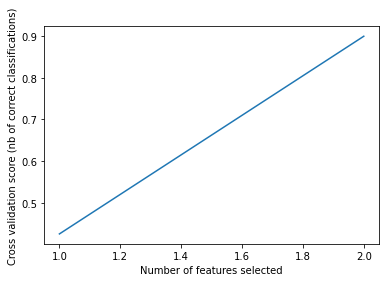

In [30]:
import matplotlib.pyplot as plt
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(RFECV.grid_scores_) + 1), RFECV.grid_scores_)
plt.show()

In [37]:
rfe = RFE(SVC3, n_features_to_select=2)

In [38]:
X_selected = rfe.fit_transform(tezheng3, target3)

In [39]:
print(rfe.get_support(indices=True))

[0 1]


In [40]:
print(rfe.n_features_) 

2


In [41]:
print(X_selected)

[[-0.86830228 -0.66340003]
 [-0.86869784 -0.96295616]
 [-0.86730739 -1.05562035]
 [-0.86618642 -0.99435698]
 [-0.86838345 -0.96913825]
 [-0.86728354 -1.05950992]
 [-0.85596099 -0.51457995]
 [ 0.28612752 -0.13920881]
 [-0.27156929  0.60420838]
 [-0.26108728 -0.17662697]
 [ 2.38656799  0.57909778]
 [ 0.64888012 -0.04946684]
 [-0.86828305 -0.47424442]
 [-0.85365796 -0.73797882]
 [ 1.01863008  1.91906155]
 [ 0.51047602  2.60118424]
 [ 2.09978116  0.89738488]
 [ 1.00087605 -0.2781394 ]
 [-0.09209256  0.37547954]
 [ 0.45747311  1.09881052]]


In [42]:
print(rfe.ranking_)

[1 1]


In [ ]:
print(features.columns[rfe.get_support(indices=True)])

In [32]:
shuju23= pd.read_excel("LIPIRIN-TUMOR-IDE-target-gong2.xlsx",index_col=0)

In [33]:
shuju23_ =shuju23.copy()

In [34]:
shuju23_

,D-Ribose 5-phosphate,Hypoxanthine,CLASS2
Name,,,
K-1,1.406731e+06,9.306818e+07,NaN
K-2,1.917346e+06,6.526088e+07,NaN
K-3,1.902215e+06,5.711676e+07,NaN
K-4,1.738707e+06,1.767468e+08,NaN
K-5,2.318807e+06,1.278038e+08,NaN
K-6,2.790601e+06,1.200290e+08,NaN
K-7,2.625609e+06,1.055056e+08,NaN
K-8,1.081681e+06,5.644196e+07,NaN
K-9,1.816853e+06,2.122606e+08,NaN


In [35]:
FFS23 =shuju23_.drop(columns=['CLASS2'])

In [36]:
FFS23.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, K-1 to K-50
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   D-Ribose 5-phosphate  48 non-null     float64
 1   Hypoxanthine          48 non-null     float64
dtypes: float64(2)
memory usage: 1.1+ KB


In [37]:
target23 = shuju23_.CLASS2

In [38]:
transfer = StandardScaler()

In [39]:
tezheng23 = transfer.fit_transform(FFS23)

In [40]:
tezheng23

array([[-8.76762360e-01, -2.12426614e-01],
       [-6.41260789e-01, -8.76357526e-01],
       [-6.48239596e-01, -1.07080783e+00],
       [-7.23651339e-01,  1.78549639e+00],
       [-4.56102893e-01,  6.16925792e-01],
       [-2.38505944e-01,  4.31293200e-01],
       [-3.14601998e-01,  8.45299748e-02],
       [-1.02667927e+00, -1.08691934e+00],
       [-6.87609690e-01,  2.63342946e+00],
       [ 2.93180785e-02,  3.19406453e-01],
       [-4.20844145e-01, -1.09919878e+00],
       [ 4.22093323e+00, -9.43430232e-01],
       [ 1.32263514e+00, -7.11348548e-02],
       [-4.57325330e-01, -6.82402361e-01],
       [-1.59468531e-01,  2.70011925e-01],
       [-3.96960259e-01,  2.66830905e-01],
       [ 3.74618170e-01, -3.07850027e-02],
       [-5.60299705e-01, -1.52874379e-01],
       [-5.35838529e-01, -1.29588818e+00],
       [ 3.12669159e+00,  2.47871557e+00],
       [-2.08914700e-01,  1.74097399e+00],
       [-5.17538632e-01, -1.30968121e-03],
       [-3.43257187e-01,  3.63681964e-01],
       [-5.

In [41]:
test_predict = SVC3.predict(tezheng23)
test_predict

array([1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0], dtype=int64)